#Preprocessing and Text Normalization

In [8]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Download stopwords from NLTK
nltk.download('stopwords')

# Define Gujarati stopwords
stop_words = set([
    'અને', 'તે', 'છે', 'હવે', 'કે', 'આ', 'તેથી', 'કેમકે', 'તેમજ', 'માટે', 'પણ', 'તો', 'જ',
    'જે', 'હા', 'કહે', 'હમણાં', 'તેને', 'ની', 'માં', 'વખતે', 'પર', 'એ', 'કોઈ', 'સુધી', 'હવે',
    'અમે', 'અન્ય', 'અંદર', 'અથવા', 'અત્યારે', 'અને', 'અપેક્ષા', 'અપેક્ષિત', 'અનુકૂળ', 'અનુસાર',
    'અહીં', 'આ', 'આવી', 'આવું', 'આખું', 'આખી', 'આમ', 'આમણે', 'આમને', 'આયુર્વેદ', 'આરંભે', 'આને', 'આપ', 'આપણે', 'આપણું', 'આપણો', 'આપવાનો', 'આપી', 'આવી', 'આવું'
])

# Load the dataset
data = pd.read_csv('q12.csv')  # Replace with your actual path

# Text cleaning function for normalization
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and special characters
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply the text cleaning function to the 'Sentence' column
data['cleaned_text'] = data['Sentence'].apply(clean_text)

# Filter sentences based on length (e.g., between 5 and 50 words)
min_length = 5
max_length = 50

def filter_sentence_length(text):
    word_count = len(text.split())
    return min_length <= word_count <= max_length

data = data[data['cleaned_text'].apply(filter_sentence_length)]

# Label encoding for Sentiment and Emotion
sentiment_encoder = LabelEncoder()
emotion_encoder = LabelEncoder()

data['Sentiment_encoded'] = sentiment_encoder.fit_transform(data['Sentiment'])
data['Emotion_encoded'] = emotion_encoder.fit_transform(data['Emotion'])

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['cleaned_text'])

# Splitting the dataset into training and testing sets
X_train_sent, X_test_sent, y_train_sent, y_test_sent = train_test_split(X, data['Sentiment_encoded'], test_size=0.2, random_state=42)
X_train_emo, X_test_emo, y_train_emo, y_test_emo = train_test_split(X, data['Emotion_encoded'], test_size=0.2, random_state=42)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Training the Logistic Regression Models

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize Logistic Regression model with class balancing
sentiment_model = LogisticRegression(max_iter=1000, class_weight='balanced')
emotion_model = LogisticRegression(max_iter=1000, class_weight='balanced')

# Train the sentiment model
sentiment_model.fit(X_train_sent, y_train_sent)

# Train the emotion model
emotion_model.fit(X_train_emo, y_train_emo)

# Make predictions on test data
y_pred_sent = sentiment_model.predict(X_test_sent)
y_pred_emo = emotion_model.predict(X_test_emo)

# Evaluate sentiment model
accuracy_sent = accuracy_score(y_test_sent, y_pred_sent)
precision_sent = precision_score(y_test_sent, y_pred_sent, average='weighted')
recall_sent = recall_score(y_test_sent, y_pred_sent, average='weighted')
f1_sent = f1_score(y_test_sent, y_pred_sent, average='weighted')
conf_matrix_sent = confusion_matrix(y_test_sent, y_pred_sent)

# Evaluate emotion model
accuracy_emo = accuracy_score(y_test_emo, y_pred_emo)
precision_emo = precision_score(y_test_emo, y_pred_emo, average='weighted')
recall_emo = recall_score(y_test_emo, y_pred_emo, average='weighted')
f1_emo = f1_score(y_test_emo, y_pred_emo, average='weighted')
conf_matrix_emo = confusion_matrix(y_test_emo, y_pred_emo)

# Display the evaluation metrics for Sentiment
print("Sentiment Model Evaluation:")
print(f"Accuracy: {accuracy_sent}")
print(f"Precision: {precision_sent}")
print(f"Recall: {recall_sent}")
print(f"F1 Score: {f1_sent}")
print("Confusion Matrix:")
print(conf_matrix_sent)

# Display the evaluation metrics for Emotion
print("\nEmotion Model Evaluation:")
print(f"Accuracy: {accuracy_emo}")
print(f"Precision: {precision_emo}")
print(f"Recall: {recall_emo}")
print(f"F1 Score: {f1_emo}")
print("Confusion Matrix:")
print(conf_matrix_emo)


Sentiment Model Evaluation:
Accuracy: 0.99395
Precision: 0.9939981299237562
Recall: 0.99395
F1 Score: 0.9939499320133447
Confusion Matrix:
[[13385     2     0]
 [    0 13348    40]
 [    0   200 13025]]

Emotion Model Evaluation:
Accuracy: 0.958425
Precision: 0.9586460049958134
Recall: 0.958425
F1 Score: 0.9584984818287671
Confusion Matrix:
[[4333    0   61    0   11    3    1  114    0]
 [   0 4547    0    0    0    0    0    0    0]
 [ 101    0 4002    0    3    8    0  352    0]
 [   0    1    0 4264    0    0    0    0  168]
 [  45    0   15    0 4299   21    0   19    0]
 [  24    0   22    0   38 4368    0   29    0]
 [   0    0   11    0    2    0 4332    0    0]
 [ 140    0  300    0    3    9    0 3947    0]
 [   0    0    1  161    0    0    0    0 4245]]


#Testing with Custom Gujarati Sentences and Their English Translation

In [21]:
# Custom sentences for testing (Gujarati poetry)
custom_sentences = [
    "શબ્દો ખૂટે છે શ્વાસો રોકાઈ ગયેલા આંસુઓના दरिया ઓગળી ગયેલા",
    "હસતો સપનારો રંગીન આકાશ આનંદની રમઝટ જીવનમાં",
    "અંધકારની ઓટમાં કિરણ આશાના પંખી ઉડશે નિર્ભય",
    "મૃદુ સ્પર્શમાં  છે જગતનો સ્પંદન પ્રેમમાં ઓગળતું દિલ આકાશનો કણ",
    #"આખોનો  છે શબ્દો તીક્ષ્ણ તીર ક્રોધનો વાવર છે ઠંડો હવાસ"
    "આખોનો આગ શબ્દો તીક્ષ્ણ આક્રમક તીર ક્રોધનો વાવર ભરાય ઠંડો હવાસ"
]

# English translations for reference
english_translations = [
    "Words fall short, breaths have stopped, the ocean of tears has dissolved in the eyes.",
    "A smiling dreamer, a colorful sky, joy dances today in life.",
    "In the shadow of darkness, there is a ray, the bird of hope will fly fearless.",
    "In your tender touch, I feel the pulse of the world, a heart melting in love, becoming a part of the sky.",
    "Fire in the eyes, words are sharp arrows, the storm of anger fills the cold air."
]

# Preprocess the custom sentences
custom_processed_sentences = [clean_text(sentence) for sentence in custom_sentences]

# Transform the custom sentences using the TF-IDF vectorizer
custom_tfidf = tfidf.transform(custom_processed_sentences)

# Predict sentiment for custom sentences
custom_sentiment_pred = sentiment_model.predict(custom_tfidf)
custom_emotion_pred = emotion_model.predict(custom_tfidf)

# Decode the predictions
custom_sentiment_labels = sentiment_encoder.inverse_transform(custom_sentiment_pred)
custom_emotion_labels = emotion_encoder.inverse_transform(custom_emotion_pred)

# Display the predictions alongside the original sentences and English translations
for i, sentence in enumerate(custom_sentences):
    print(f"Gujarati Sentence: {sentence}")
    print(f"English Translation: {english_translations[i]}")
    print(f"Predicted Sentiment: {custom_sentiment_labels[i]}")
    print(f"Predicted Emotion: {custom_emotion_labels[i]}")
    print("-" * 50)


Gujarati Sentence: શબ્દો ખૂટે છે શ્વાસો રોકાઈ ગયેલા આંસુઓના दरिया ઓગળી ગયેલા
English Translation: Words fall short, breaths have stopped, the ocean of tears has dissolved in the eyes.
Predicted Sentiment: Negative
Predicted Emotion: Sadness
--------------------------------------------------
Gujarati Sentence: હસતો સપનારો રંગીન આકાશ આનંદની રમઝટ જીવનમાં
English Translation: A smiling dreamer, a colorful sky, joy dances today in life.
Predicted Sentiment: Positive
Predicted Emotion: Hope
--------------------------------------------------
Gujarati Sentence: અંધકારની ઓટમાં કિરણ આશાના પંખી ઉડશે નિર્ભય
English Translation: In the shadow of darkness, there is a ray, the bird of hope will fly fearless.
Predicted Sentiment: Positive
Predicted Emotion: Hope
--------------------------------------------------
Gujarati Sentence: મૃદુ સ્પર્શમાં  છે જગતનો સ્પંદન પ્રેમમાં ઓગળતું દિલ આકાશનો કણ
English Translation: In your tender touch, I feel the pulse of the world, a heart melting in love, becoming a p

#ROC and AUC Curve Plotting

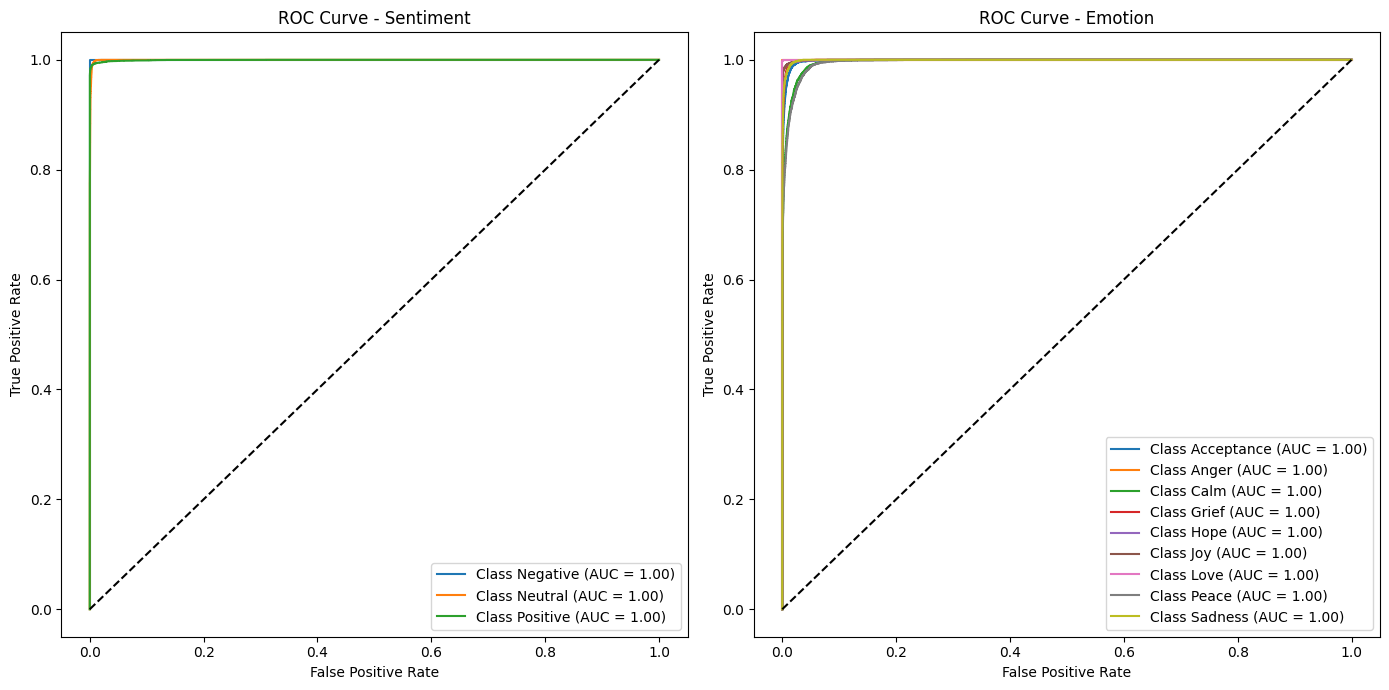

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the true labels for multi-class ROC/AUC
y_test_sent_binarized = label_binarize(y_test_sent, classes=range(len(sentiment_encoder.classes_)))
y_test_emo_binarized = label_binarize(y_test_emo, classes=range(len(emotion_encoder.classes_)))

# Get the predicted probabilities
y_pred_sent_proba = sentiment_model.predict_proba(X_test_sent)
y_pred_emo_proba = emotion_model.predict_proba(X_test_emo)

# Plot ROC and AUC for Sentiment
fpr_sent = {}
tpr_sent = {}
roc_auc_sent = {}

for i in range(len(sentiment_encoder.classes_)):
    fpr_sent[i], tpr_sent[i], _ = roc_curve(y_test_sent_binarized[:, i], y_pred_sent_proba[:, i])
    roc_auc_sent[i] = auc(fpr_sent[i], tpr_sent[i])

plt.figure(figsize=(14, 7))

# Plot ROC curves for Sentiment
plt.subplot(1, 2, 1)
for i in range(len(sentiment_encoder.classes_)):
    plt.plot(fpr_sent[i], tpr_sent[i], label=f'Class {sentiment_encoder.classes_[i]} (AUC = {roc_auc_sent[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Sentiment')
plt.legend(loc="lower right")

# Plot ROC and AUC for Emotion
fpr_emo = {}
tpr_emo = {}
roc_auc_emo = {}

for i in range(len(emotion_encoder.classes_)):
    fpr_emo[i], tpr_emo[i], _ = roc_curve(y_test_emo_binarized[:, i], y_pred_emo_proba[:, i])
    roc_auc_emo[i] = auc(fpr_emo[i], tpr_emo[i])

# Plot ROC curves for Emotion
plt.subplot(1, 2, 2)
for i in range(len(emotion_encoder.classes_)):
    plt.plot(fpr_emo[i], tpr_emo[i], label=f'Class {emotion_encoder.classes_[i]} (AUC = {roc_auc_emo[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Emotion')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


#Double Bar Graph for True vs Predicted (Sentiment and Emotion)

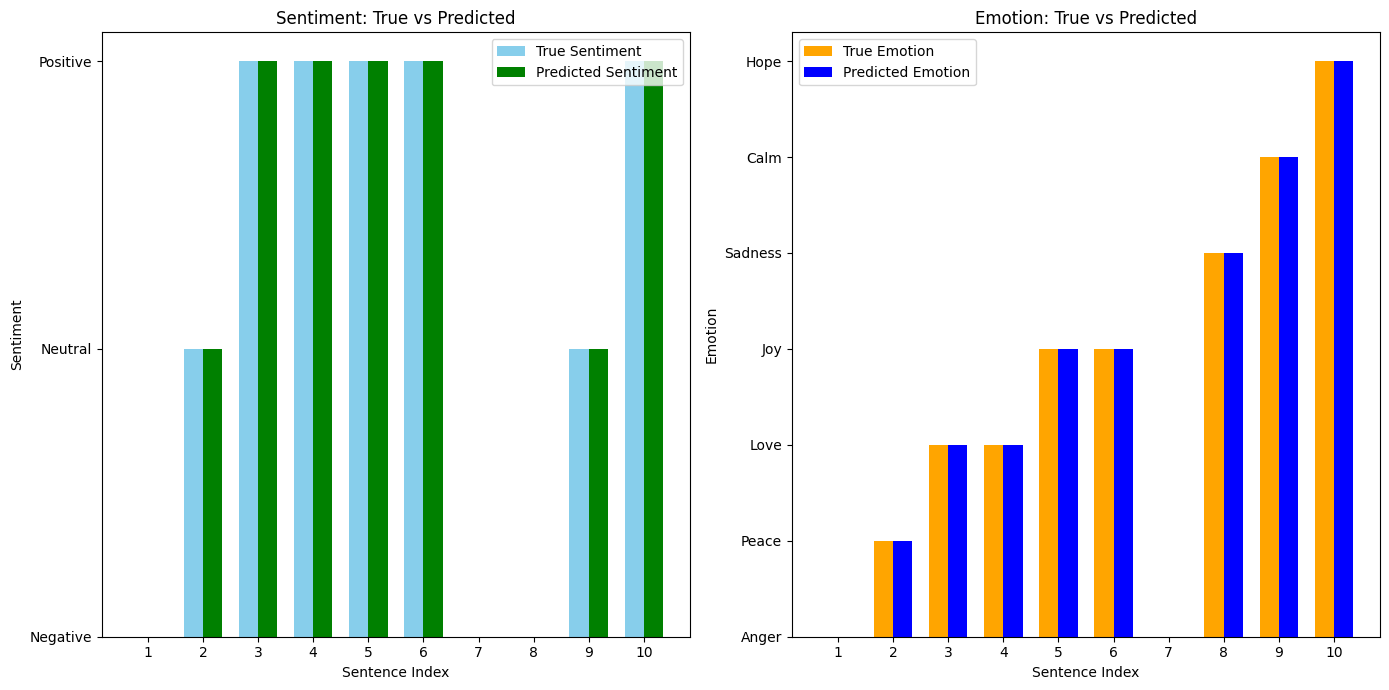

In [23]:
import numpy as np

# Randomly select 10 sentences from the dataset for testing
sample_data = data.sample(n=10, random_state=42)
sample_sentences = sample_data['Sentence'].tolist()
sample_true_sentiments = sample_data['Sentiment_encoded'].tolist()
sample_true_emotions = sample_data['Emotion_encoded'].tolist()

# Transform the sentences using the TF-IDF vectorizer
sample_tfidf = tfidf.transform(sample_data['cleaned_text'])

# Predict sentiment and emotion
pred_sent = sentiment_model.predict(sample_tfidf)
pred_emo = emotion_model.predict(sample_tfidf)

# Decode true and predicted labels
true_sent_labels = sentiment_encoder.inverse_transform(sample_true_sentiments)
true_emo_labels = emotion_encoder.inverse_transform(sample_true_emotions)
pred_sent_labels = sentiment_encoder.inverse_transform(pred_sent)
pred_emo_labels = emotion_encoder.inverse_transform(pred_emo)

# Plotting Bar Plot: True vs Predicted for Sentiment and Emotion
plt.figure(figsize=(14, 7))

# Sentiment Bar Plot
plt.subplot(1, 2, 1)
x = np.arange(len(sample_sentences))  # Label locations
bar_width = 0.35  # Width of the bars

# Plot bars for true sentiment
plt.bar(x - bar_width/2, true_sent_labels, width=bar_width, color='skyblue', label='True Sentiment')

# Plot bars for predicted sentiment
plt.bar(x + bar_width/2, pred_sent_labels, width=bar_width, color='green', label='Predicted Sentiment')

# Label the plot
plt.title('Sentiment: True vs Predicted')
plt.xlabel('Sentence Index')
plt.ylabel('Sentiment')
plt.xticks(x, range(1, len(sample_sentences) + 1))
plt.legend()

# Emotion Bar Plot
plt.subplot(1, 2, 2)
x = np.arange(len(sample_sentences))  # Label locations

# Plot bars for true emotion
plt.bar(x - bar_width/2, true_emo_labels, width=bar_width, color='orange', label='True Emotion')

# Plot bars for predicted emotion
plt.bar(x + bar_width/2, pred_emo_labels, width=bar_width, color='blue', label='Predicted Emotion')

# Label the plot
plt.title('Emotion: True vs Predicted')
plt.xlabel('Sentence Index')
plt.ylabel('Emotion')
plt.xticks(x, range(1, len(sample_sentences) + 1))
plt.legend()

plt.tight_layout()
plt.show()


#Line Graph for True vs Predicted (Sentiment and Emotion)

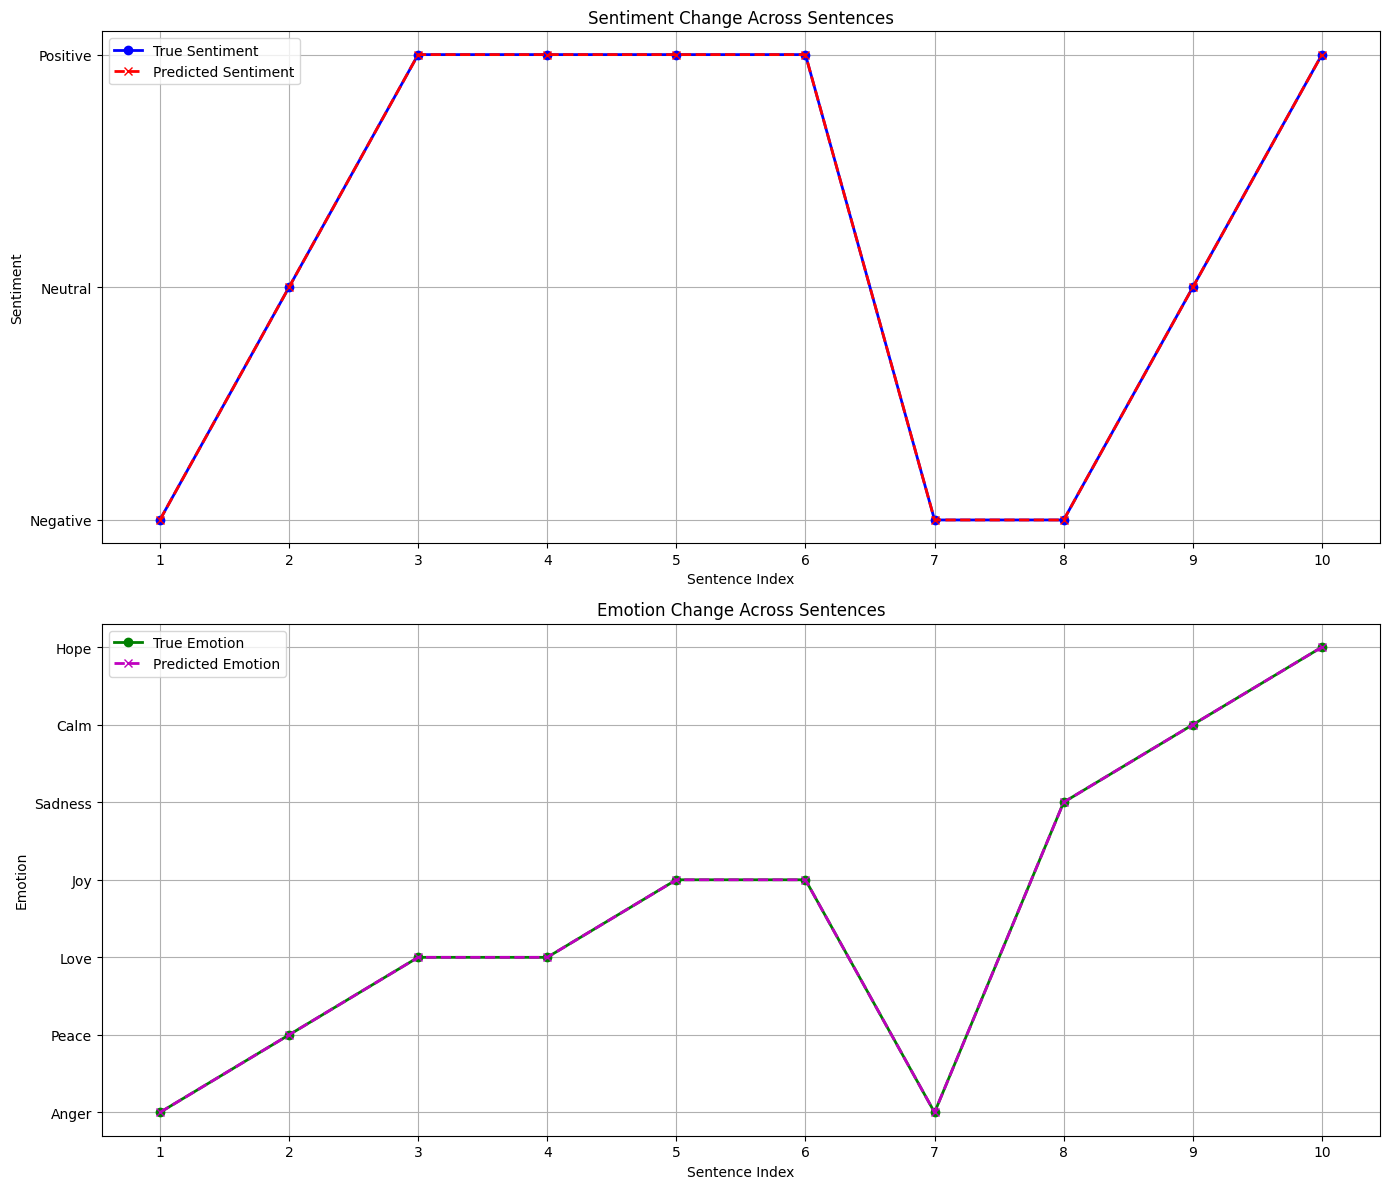

In [24]:
# Line Graph for Sentiment and Emotion Predictions
plt.figure(figsize=(14, 12))

# Sentiment Line Graph
plt.subplot(2, 1, 1)
plt.plot(range(len(sample_sentences)), true_sent_labels, marker='o', linestyle='-', color='b', label='True Sentiment', linewidth=2)
plt.plot(range(len(sample_sentences)), pred_sent_labels, marker='x', linestyle='--', color='r', label='Predicted Sentiment', linewidth=2)
plt.title('Sentiment Change Across Sentences')
plt.xlabel('Sentence Index')
plt.ylabel('Sentiment')
plt.xticks(range(len(sample_sentences)), range(1, len(sample_sentences) + 1))
plt.legend()
plt.grid(True)

# Emotion Line Graph
plt.subplot(2, 1, 2)
plt.plot(range(len(sample_sentences)), true_emo_labels, marker='o', linestyle='-', color='g', label='True Emotion', linewidth=2)
plt.plot(range(len(sample_sentences)), pred_emo_labels, marker='x', linestyle='--', color='m', label='Predicted Emotion', linewidth=2)
plt.title('Emotion Change Across Sentences')
plt.xlabel('Sentence Index')
plt.ylabel('Emotion')
plt.xticks(range(len(sample_sentences)), range(1, len(sample_sentences) + 1))
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
